In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import json
from datetime import datetime
from sklearn import metrics

In [2]:
dataset = pd.read_csv('final.csv')

In [3]:
df=dataset[dataset['elimination']==1].copy()

In [4]:
dataset

Unnamed: 0         Device_ID  \
0               0  VA00000000000022   
1               1  VA00000000000037   
2               2  VA00000000000037   
3               3  VA00000000000037   
4               4  VA00000000000037   
...           ...               ...   
12055       12058  VB00000000000192   
12056       12059  VB00000000000192   
12057       12060  VB00000000000192   
12058       12061  VB00000000000192   
12059       12062  VB00000000000192   

                                                Event_ID     Event_start_time  \
0      RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...  2020-10-02 16:14:13   
1      RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...  2021-10-12 14:10:23   
2      RXZlbnRJbmZvcm1hdGlvbjo0NDM5M2M2ZS1iYTQ5LTRhMD...  2021-10-15 15:31:15   
3      RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...  2021-01-11 13:19:24   
4      RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...  2021-01-13 13:01:52   
...                                                  ...                  ...   
12055  RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...  2021-08-24 01:36:18   
12056  RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...  2021-04-26 06:29:01   
12057  RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...  2021-04-27 03:47:55   
12058  RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...  2021-09-02 01:15:57   
12059  RXZlbnRJbmZvcm1hdGlvbjpmZTc0ZmZlNS1mZjdhLTRlYj...  2021-10-03 14:45:43   

                      Tare_weight  min_sum_1  max_sum_1  mean_sum_1  \
0        [4882, 2049, 1642, 3099]   1.305689   1.438657    1.382280   
1         [487, 2189, 1157, 4353]   1.447105   1.761911    1.568278   
2          [426, 1997, 737, 4750]   1.000759   1.677370    1.079310   
3        [1752, -158, 1626, 4359]   1.576461   1.887056    1.730443   
4        [1584, -948, 3099, 3569]   1.630750   1.872536    1.760114   
...                           ...        ...        ...         ...   
12055     [2340, 868, 2150, 1626]   1.406787   1.689863    1.570488   
12056     [3577, 400, 2043, 1747]   0.997940   1.003991    0.999566   
12057  [4313, -14729, 1754, 1697]  -1.601292  -1.790524   -1.724836   
12058    [3702, -893, 1561, 1940]   1.531696   1.896197    1.697779   
12059    [2867, -689, 2402, 3441]   1.319162   1.631093    1.561128   

       std_sum_1  min_sum_2  ...  ratio_min_3_weight  count_max_shift_freq  \
0       0.010210   1.291895  ...           -0.006096              0.000000   
1       0.022693   0.997557  ...            0.002590              0.251675   
2       0.194851   1.000379  ...           -0.000203              0.031658   
3       0.024650   0.996701  ...           -0.003267              0.058694   
4       0.016153   1.661145  ...           -0.005070              0.361538   
...          ...        ...  ...                 ...                   ...   
12055   0.051574   1.464920  ...            0.229349              0.608870   
12056   0.000915   0.992790  ...            0.005864              0.045405   
12057  -0.014524  -1.088155  ...           -3.297328              0.000000   
12058   0.019805   1.519334  ...           -0.005016              0.223973   
12059   0.026361   1.479741  ...           -0.003548              1.093550   

       count_max_shift_1_freq  count_max_shift_2_freq  count_max_shift_3_freq  \
0                    0.000000                0.000000                0.000000   
1                    0.292267                0.462756                0.000000   
2                    0.094974                0.000000                0.000000   
3                    0.176082                0.000000                0.000000   
4                    0.235217                0.849396                0.000000   
...                       ...                     ...                     ...   
12055                0.964044                0.405913                0.456653   
12056                0.000000                0.136214                0.000000   
12057                0.000000                0

In [5]:
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True)
dataset.drop(['index','Unnamed: 0'],axis=1,inplace=True)

In [6]:
dataset.drop(['Device_ID','Event_start_time','Weight_of_cat','Total_Tare_weight','Event_ID','Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfecv = RFECV(estimator= classifier, step = 1, cv = 5, scoring="accuracy")
rfecv = rfecv.fit(X_train, y_train)


print("Num Features: %d" % rfecv.n_features_)
print("Selected Features: %s" % rfecv.support_)
print("Feature Ranking: %s" % rfecv.ranking_)

Num Features: 31
Selected Features: [ True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True False False False False False False False False  True  True
  True  True  True  True  True  True False False False False False False
 False False]
Feature Ranking: [ 1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
  7  1  6 10 15 20  9 14 18 19  1  1  1  1  1  1  1  1 11  3 12 17  5  8
 13 16]


In [11]:
column_headers = list(dataset.columns.values)
rank=rfecv.ranking_
for i in range(len(rank)):
    if rank[i]==1:
        print(column_headers[i])
        

min_sum_1
max_sum_1
mean_sum_1
std_sum_1
min_sum_2
mean_sum_2
std_sum_2
min_sum_3
max_sum_3
mean_sum_3
std_sum_3
max_10_dev
max_10_dev_1
max_10_dev_2
max_10_dev_3
max_10_dur
max_10_dur_1
max_10_dur_2
max_10_dur_3
hour_day
min_sum
max_sum
duration_of_event
ratio_10_weight
ratio_10_1_weight
ratio_10_2_weight
ratio_10_3_weight
ratio_min_weight
ratio_min_1_weight
ratio_min_2_weight
ratio_min_3_weight


In [12]:
y_pred = rfecv.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 792  183]
 [ 140 1842]]
accuracy : 0.8907676699357457


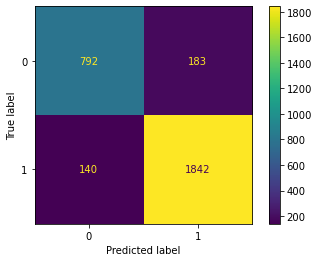

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
#print('precision :',metrics.average_precision_score(y_test, y_pred))
print('accuracy :',accuracy_score(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels= rfecv.classes_)
cmd.plot()
plt.show()

In [14]:
dsx=[]
for i in range(dataset.shape[0]):
        x=rfecv.predict(sc.transform([X[i]]))
        dsx.append(x[0])

[[3542  206]
 [ 170 7907]]
accuracy : 0.9682029598308668


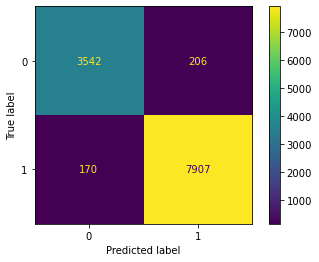

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y,dsx)
print(cm)
#print('precision :',metrics.average_precision_score(y,dsx))
print('accuracy :',accuracy_score(y,dsx))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm,display_labels= rfecv.classes_)
cmd.plot()
plt.show()

In [16]:
df

Unnamed: 0         Device_ID  \
0               0  VA00000000000022   
1               1  VA00000000000037   
3               3  VA00000000000037   
4               4  VA00000000000037   
5               5  VA00000000000037   
...           ...               ...   
12053       12056  VB00000000000192   
12055       12058  VB00000000000192   
12057       12060  VB00000000000192   
12058       12061  VB00000000000192   
12059       12062  VB00000000000192   

                                                Event_ID     Event_start_time  \
0      RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...  2020-10-02 16:14:13   
1      RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...  2021-10-12 14:10:23   
3      RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...  2021-01-11 13:19:24   
4      RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...  2021-01-13 13:01:52   
5      RXZlbnRJbmZvcm1hdGlvbjo0OTFiMTg2Ni1hMGUwLTQ4NT...  2020-12-06 07:01:38   
...                                                  ...                  ...   
12053  RXZlbnRJbmZvcm1hdGlvbjplNDg0ZmE4Ny02NjUxLTRiMz...  2021-04-29 16:08:23   
12055  RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...  2021-08-24 01:36:18   
12057  RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...  2021-04-27 03:47:55   
12058  RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...  2021-09-02 01:15:57   
12059  RXZlbnRJbmZvcm1hdGlvbjpmZTc0ZmZlNS1mZjdhLTRlYj...  2021-10-03 14:45:43   

                      Tare_weight  min_sum_1  max_sum_1  mean_sum_1  \
0        [4882, 2049, 1642, 3099]   1.305689   1.438657    1.382280   
1         [487, 2189, 1157, 4353]   1.447105   1.761911    1.568278   
3        [1752, -158, 1626, 4359]   1.576461   1.887056    1.730443   
4        [1584, -948, 3099, 3569]   1.630750   1.872536    1.760114   
5           [679, 95, 2875, 3166]   1.316067   1.887307    1.802428   
...                           ...        ...        ...         ...   
12053       [3484, 91, 871, 2875]   1.491053   1.719984    1.607211   
12055     [2340, 868, 2150, 1626]   1.406787   1.689863    1.570488   
12057  [4313, -14729, 1754, 1697]  -1.601292  -1.790524   -1.724836   
12058    [3702, -893, 1561, 1940]   1.531696   1.896197    1.697779   
12059    [2867, -689, 2402, 3441]   1.319162   1.631093    1.561128   

       std_sum_1  min_sum_2  ...  ratio_min_3_weight  count_max_shift_freq  \
0       0.010210   1.291895  ...           -0.006096              0.000000   
1       0.022693   0.997557  ...            0.002590              0.251675   
3       0.024650   0.996701  ...           -0.003267              0.058694   
4       0.016153   1.661145  ...           -0.005070              0.361538   
5       0.045489   1.713573  ...           -0.004543              0.184808   
...          ...        ...  ...                 ...                   ...   
12053   0.020131   1.470018  ...           -0.004299              0.274502   
12055   0.051574   1.464920  ...            0.229349              0.608870   
12057  -0.014524  -1.088155  ...           -3.297328              0.000000   
12058   0.019805   1.519334  ...           -0.005016              0.223973   
12059   0.026361   1.479741  ...           -0.003548              1.093550   

       count_max_shift_1_freq  count_max_shift_2_freq  count_max_shift_3_freq  \
0                    0.000000                0.000000                0.000000   
1                    0.292267                0.462756                0.000000   
3                    0.176082                0.000000                0.000000   
4                    0.235217                0.849396                0.000000   
5                    0.358745                0.163066                0.032613   
...                       ...                     ...                     ...   
12053                0.053474                0.705861                0.064169   
12055                0.964044                0.405913                0.456653   
12057                0.000000                0

In [17]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(['index','Unnamed: 0','elimination'],axis=1,inplace=True)
df['defecation']=0
for i in range(df.shape[0]):
    if 'urination' in df['Tags'][i]:
        df['defecation'][i]=1  

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1581227289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['defecation'][i]=1


In [18]:
df.drop(['Device_ID','Event_start_time','Total_Tare_weight','Weight_of_cat','Event_ID','Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [19]:
X1 = df.iloc[:, :-1].values
y1= df.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
classifier1 =RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfecv1 = RFECV(estimator= classifier1, step = 1, cv = 5, scoring="accuracy")
rfecv1 = rfecv1.fit(X1_train, y1_train)


print("Num Features: %d" % rfecv1.n_features_)
print("Selected Features: %s" % rfecv1.support_)
print("Feature Ranking: %s" % rfecv1.ranking_)

Num Features: 17
Selected Features: [False False False  True False False  True  True False False  True  True
 False False  True False  True  True  True  True  True False False False
  True  True False False False False False False False False False False
  True  True False False  True  True False False False False False False
 False False]
Feature Ranking: [ 9 12  8  1 10 17  1  1 19  5  1  1 14 18  1 13  1  1  1  1  1  6 23  2
  1  1 29 16 27 34  7 25 26 33  3 22  1  1 24  4  1  1 11 15 21 32 28 20
 30 31]


In [23]:
column_headers1 = list(df.columns.values)
rank1=rfecv1.ranking_
for i in range(len(rank1)):
    if rank1[i]==1:
        print(column_headers1[i])

std_sum_1
mean_sum_2
std_sum_2
mean_sum_3
std_sum_3
max_10_dev_2
max_10_dur
max_10_dur_1
max_10_dur_2
max_10_dur_3
hour_day
std_sum
duration_of_event
ratio_10_2_weight
ratio_10_3_weight
ratio_min_2_weight
ratio_min_3_weight


In [24]:
y1_pred = rfecv1.predict(X1_test)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[1 1]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


[[ 358  135]
 [ 131 1396]]
accuracy : 0.8683168316831683


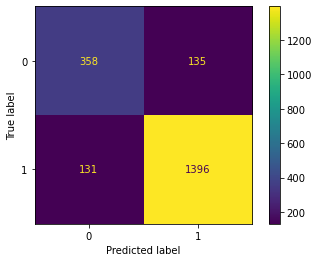

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y1_test, y1_pred)
print(cm1)
#print('precision :',metrics.average_precision_score(y1_test, y1_pred))
print('accuracy :',accuracy_score(y1_test, y1_pred))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm1,display_labels= rfecv1.classes_)
cmd.plot()
plt.show()

In [26]:
dsx1=[]
for i in range(df.shape[0]):
        x1=rfecv1.predict(sc1.transform([X1[i]]))
        dsx1.append(x1[0])

[[1930  151]
 [ 158 5838]]
accuracy 0.9617432214931286


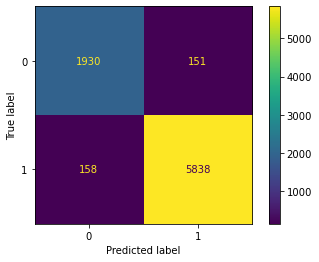

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1= confusion_matrix(y1,dsx1)
print(cm1)
#print('precision :',metrics.average_precision_score(y1,dsx1))
print('accuracy',accuracy_score(y1,dsx1))
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm1,display_labels= rfecv1.classes_)
cmd.plot()
plt.show()

In [28]:
df1=pd.read_csv('final.csv')

In [29]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1.drop(['index','Unnamed: 0','Total_Tare_weight','Weight_of_cat'],axis=1,inplace=True)

In [30]:
df1

Device_ID                                           Event_ID  \
0      VA00000000000022  RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...   
1      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...   
2      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NDM5M2M2ZS1iYTQ5LTRhMD...   
3      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...   
4      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...   
...                 ...                                                ...   
11820  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...   
11821  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...   
11822  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...   
11823  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...   
11824  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmZTc0ZmZlNS1mZjdhLTRlYj...   

          Event_start_time                 Tare_weight  min_sum_1  max_sum_1  \
0      2020-10-02 16:14:13    [4882, 2049, 1642, 3099]   1.305689   1.438657   
1      2021-10-12 14:10:23     [487, 2189, 1157, 4353]   1.447105   1.761911   
2      2021-10-15 15:31:15      [426, 1997, 737, 4750]   1.000759   1.677370   
3      2021-01-11 13:19:24    [1752, -158, 1626, 4359]   1.576461   1.887056   
4      2021-01-13 13:01:52    [1584, -948, 3099, 3569]   1.630750   1.872536   
...                    ...                         ...        ...        ...   
11820  2021-08-24 01:36:18     [2340, 868, 2150, 1626]   1.406787   1.689863   
11821  2021-04-26 06:29:01     [3577, 400, 2043, 1747]   0.997940   1.003991   
11822  2021-04-27 03:47:55  [4313, -14729, 1754, 1697]  -1.601292  -1.790524   
11823  2021-09-02 01:15:57    [3702, -893, 1561, 1940]   1.531696   1.896197   
11824  2021-10-03 14:45:43    [2867, -689, 2402, 3441]   1.319162   1.631093   

       mean_sum_1  std_sum_1  min_sum_2  max_sum_2  ...  ratio_min_3_weight  \
0        1.382280   0.010210   1.291895   1.458191  ...           -0.006096   
1        1.568278   0.022693   0.997557   1.645370  ...            0.002590   
2        1.079310   0.194851   1.000379   1.001517  ...           -0.000203   
3        1.730443   0.024650   0.996701   1.857897  ...           -0.003267   
4        1.760114   0.016153   1.661145   1.907037  ...           -0.005070   
...           ...        ...        ...        ...  ...                 ...   
11820    1.570488   0.051574   1.464920   1.738259  ...            0.229349   
11821    0.999566   0.000915   0.992790   1.675808  ...            0.005864   
11822   -1.724836  -0.014524  -1.088155  -1.795980  ...           -3.297328   
11823    1.697779   0.019805   1.519334   1.797147  ...           -0.005016   
11824    1.561128   0.026361   1.479741   1.625109  ...           -0.003548   

       count_max_shift_freq  count_max_shift_1_freq  count_max_shift_2_freq  \
0                  0.000000                0.000000                0.000000   
1                  0.251675                0.292267                0.462756   
2                  0.031658                0.094974                0.000000   
3                  0.058694                0.176082                0.000000   
4                  0.361538                0.235217                0.849396   
...                     ...                     ...                     ...   
11820              0.608870                0.964044                0.405913   
11821              0.045405                0.000000                0.136214   
11822              0.000000                0.000000                0.000000   
11823              0.223973                0.175283                0.321353   
11824              1.093550                0.662439                1.356423   

       count_max_shift_3_freq  count_min_shift_freq  count_min_shift_1_freq  \
0                    0.000000              0.000000                0.000000   
1                    0.000000              0.251675         

In [31]:
df1['elimination']=0
df1['defecation']=2

In [32]:
for i in range(df1.shape[0]):
    if 'defecation' in df1['Tags'][i]:
        df1['elimination'][i]=1
        df1['defecation'][i]=0
    if 'urination' in df1['Tags'][i]:
        df1['elimination'][i]=1
        df1['defecation'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1654308507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elimination'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1654308507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['defecation'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1654308507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['elimination'][i

In [33]:
df2=df1.copy()

In [34]:
df1

Device_ID                                           Event_ID  \
0      VA00000000000022  RXZlbnRJbmZvcm1hdGlvbjplZTIwZDI4MC1iMTNkLTQwYj...   
1      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0MzdlNTU1MS1hODQ2LTQyMW...   
2      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NDM5M2M2ZS1iYTQ5LTRhMD...   
3      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NjgwYjJhMy00MjQzLTQwOD...   
4      VA00000000000037  RXZlbnRJbmZvcm1hdGlvbjo0NjhiZGY1Mi0wNzMyLTQzOD...   
...                 ...                                                ...   
11820  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...   
11821  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...   
11822  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...   
11823  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...   
11824  VB00000000000192  RXZlbnRJbmZvcm1hdGlvbjpmZTc0ZmZlNS1mZjdhLTRlYj...   

          Event_start_time                 Tare_weight  min_sum_1  max_sum_1  \
0      2020-10-02 16:14:13    [4882, 2049, 1642, 3099]   1.305689   1.438657   
1      2021-10-12 14:10:23     [487, 2189, 1157, 4353]   1.447105   1.761911   
2      2021-10-15 15:31:15      [426, 1997, 737, 4750]   1.000759   1.677370   
3      2021-01-11 13:19:24    [1752, -158, 1626, 4359]   1.576461   1.887056   
4      2021-01-13 13:01:52    [1584, -948, 3099, 3569]   1.630750   1.872536   
...                    ...                         ...        ...        ...   
11820  2021-08-24 01:36:18     [2340, 868, 2150, 1626]   1.406787   1.689863   
11821  2021-04-26 06:29:01     [3577, 400, 2043, 1747]   0.997940   1.003991   
11822  2021-04-27 03:47:55  [4313, -14729, 1754, 1697]  -1.601292  -1.790524   
11823  2021-09-02 01:15:57    [3702, -893, 1561, 1940]   1.531696   1.896197   
11824  2021-10-03 14:45:43    [2867, -689, 2402, 3441]   1.319162   1.631093   

       mean_sum_1  std_sum_1  min_sum_2  max_sum_2  ...  count_max_shift_freq  \
0        1.382280   0.010210   1.291895   1.458191  ...              0.000000   
1        1.568278   0.022693   0.997557   1.645370  ...              0.251675   
2        1.079310   0.194851   1.000379   1.001517  ...              0.031658   
3        1.730443   0.024650   0.996701   1.857897  ...              0.058694   
4        1.760114   0.016153   1.661145   1.907037  ...              0.361538   
...           ...        ...        ...        ...  ...                   ...   
11820    1.570488   0.051574   1.464920   1.738259  ...              0.608870   
11821    0.999566   0.000915   0.992790   1.675808  ...              0.045405   
11822   -1.724836  -0.014524  -1.088155  -1.795980  ...              0.000000   
11823    1.697779   0.019805   1.519334   1.797147  ...              0.223973   
11824    1.561128   0.026361   1.479741   1.625109  ...              1.093550   

       count_max_shift_1_freq  count_max_shift_2_freq  count_max_shift_3_freq  \
0                    0.000000                0.000000                0.000000   
1                    0.292267                0.462756                0.000000   
2                    0.094974                0.000000                0.000000   
3                    0.176082                0.000000                0.000000   
4                    0.235217                0.849396                0.000000   
...                       ...                     ...                     ...   
11820                0.964044                0.405913                0.456653   
11821                0.000000                0.136214                0.000000   
11822                0.000000                0.000000                0.000000   
11823                0.175283                0.321353                0.175283   
11824                0.662439                1.356423                1.261789   

       count_min_shift_freq  count_min_shift_1_freq  count_min_shift_2_freq  \
0                  0.000000                0.000000                0.104180   
1           

In [35]:
df1.iloc[:,3:-2]

Tare_weight  min_sum_1  max_sum_1  mean_sum_1  \
0        [4882, 2049, 1642, 3099]   1.305689   1.438657    1.382280   
1         [487, 2189, 1157, 4353]   1.447105   1.761911    1.568278   
2          [426, 1997, 737, 4750]   1.000759   1.677370    1.079310   
3        [1752, -158, 1626, 4359]   1.576461   1.887056    1.730443   
4        [1584, -948, 3099, 3569]   1.630750   1.872536    1.760114   
...                           ...        ...        ...         ...   
11820     [2340, 868, 2150, 1626]   1.406787   1.689863    1.570488   
11821     [3577, 400, 2043, 1747]   0.997940   1.003991    0.999566   
11822  [4313, -14729, 1754, 1697]  -1.601292  -1.790524   -1.724836   
11823    [3702, -893, 1561, 1940]   1.531696   1.896197    1.697779   
11824    [2867, -689, 2402, 3441]   1.319162   1.631093    1.561128   

       std_sum_1  min_sum_2  max_sum_2  mean_sum_2  std_sum_2  min_sum_3  ...  \
0       0.010210   1.291895   1.458191    1.381942   0.016696   1.002313  ...   
1       0.022693   0.997557   1.645370    1.292907   0.283628   0.998534  ...   
2       0.194851   1.000379   1.001517    1.000900   0.000203   1.000126  ...   
3       0.024650   0.996701   1.857897    1.683543   0.176662   1.002375  ...   
4       0.016153   1.661145   1.907037    1.759443   0.028145   1.003834  ...   
...          ...        ...        ...         ...        ...        ...  ...   
11820   0.051574   1.464920   1.738259    1.594761   0.030554   0.864834  ...   
11821   0.000915   0.992790   1.675808    1.203776   0.261072   0.996524  ...   
11822  -0.014524  -1.088155  -1.795980   -1.525880  -0.292254  -1.090596  ...   
11823   0.019805   1.519334   1.797147    1.698419   0.016015   1.003487  ...   
11824   0.026361   1.479741   1.625109    1.564637   0.014772   1.001995  ...   

       ratio_min_2_weight  ratio_min_3_weight  count_max_shift_freq  \
0               -0.769248           -0.006096              0.000000   
1                0.004316            0.002590              0.251675   
2               -0.000610           -0.000203              0.031658   
3                0.004537           -0.003267              0.058694   
4               -0.874344           -0.005070              0.361538   
...                   ...                 ...                   ...   
11820           -0.788873            0.229349              0.608870   
11821            0.012163            0.005864              0.045405   
11822           -3.293478           -3.297328              0.000000   
11823           -0.747150           -0.005016              0.223973   
11824           -0.853215           -0.003548              1.093550   

       count_max_shift_1_freq  count_max_shift_2_freq  count_max_shift_3_freq  \
0                    0.000000                0.000000                0.000000   
1                    0.292267                0.462756                0.000000   
2                    0.094974                0.000000                0.000000   
3                    0.176082                0.000000                0.000000   
4                    0.235217                0.849396                0.000000   
...                       ...                     ...                     ...   
11820                0.964044                0.405913                0.456653   
11821                0.000000                0.136214                0.000000   
11822                0.000000                0.000000                0.000000   
11823                0.175283                0.321353                0.175283   
11824                0.662439                1.356423                1.261789   

       count_min_shift_freq  count_min_shift_1_freq  count_min_shift_2_freq  \
0                  0.000000                0.000000                0.104180   
1                  0.251675                0.292267                0.292267   
2                  0.031658                0.142462                0.000000   
3                  0.058694                0.457814   

In [36]:
df1.drop(['Tare_weight','Tags','Name_of_cat'],axis=1,inplace=True)

In [37]:
X2 = df1.iloc[:, 3:-2].values
y2= df1.iloc[:, -2].values
y3= df1.iloc[:,-1]

In [38]:
df1['predicted']=np.nan

In [39]:
temp2=[]
temp3=[]

for i in range(df1.shape[0]):
    if rfecv.predict(sc.transform([X2[i]]))[0]==1:
        temp2.append(1)
        if rfecv1.predict(sc1.transform([X2[i]]))[0]==0:
            temp3.append(0)
            df1['predicted'][i]=0
        else:
            temp3.append(1)
            df1['predicted'][i]=1
    else:
        temp3.append(2)
        temp2.append(0)
        df1['predicted'][i]=2
    

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=1
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2

C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=2
C:\Users\chandra.gorripat\AppData\Local\Temp\ipykernel_28076\1677815002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predicted'][i]=0


In [40]:
df1.to_csv('rfclassification.csv')

In [41]:
count=0
arr=[]
for i in range(df1.shape[0]):
    if (y3[i]!=temp3[i]): #and(y3[i]==1):
        #print(temp3[i])
        arr.append(i)
        count=count+1
print(count)   

679
